# Import Library

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [26]:
import os

## 1 .Collect Data 

#### A. Select 7 data files in the bottom

In [27]:
files=os.listdir(r'D:\Computer Science\Terms 9\Data Science\Project\uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

#### B. Remove file name uber-raw-data-janjune-15.csv

In [28]:
files.remove('uber-raw-data-janjune-15.csv')

#### C. List all files after remove

In [29]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

#### D. Concat all data file to assign to final varible as DataFrame

In [30]:
path=r'D:\Computer Science\Terms 9\Data Science\Project\uber-pickups-in-new-york-city'

final=pd.DataFrame()

for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([df,final])

#### E. Show number of Row and Column of data

In [31]:
final.shape

(4534327, 4)

## 2. Data Preparation

In [32]:
df=final.copy()

#### A. Display head

In [33]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


#### B. Display data type of each column

In [34]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

#### C. Change data type of column Date/Time to time format

In [35]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

#### D. Display after change data type of Date/Time column

In [36]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

#### E. Display head

In [37]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


#### F. Split Date/Time column to specific column of date format

In [38]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df["Date/Time"].dt.month
df['hour'] = df['Date/Time'].dt.hour


#### G.Display head after split column

In [39]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


#### H. Display data types of each column

In [40]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

## 3. Analysing trips of Uber

### Q1 Analysis of journey by Week-days

#### A. Diplay Bar chart with Axis X = name of day and Axis Y = numbers of each day

In [41]:
px.bar(
    x = df['weekday'].value_counts().index,
       y = df['weekday'].value_counts()
)

### Q2 Analysis of journey by hour..

#### B. Display journey by hour using histogram

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

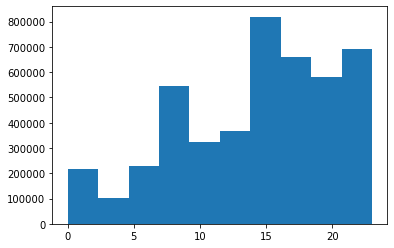

In [42]:
plt.hist(df['hour'])

#### C. Month as array

In [43]:
df['month'].unique()

array([9, 5, 6, 7, 8, 4], dtype=int64)

#### D. Test enumerate

In [44]:
for i,month in enumerate(df['month'].unique()):
    print(i)
    print(month)

0
9
1
5
2
6
3
7
4
8
5
4


#### E. Display journey by hour in histogram in each month using loop enumerate (3 rows, 2 columns)

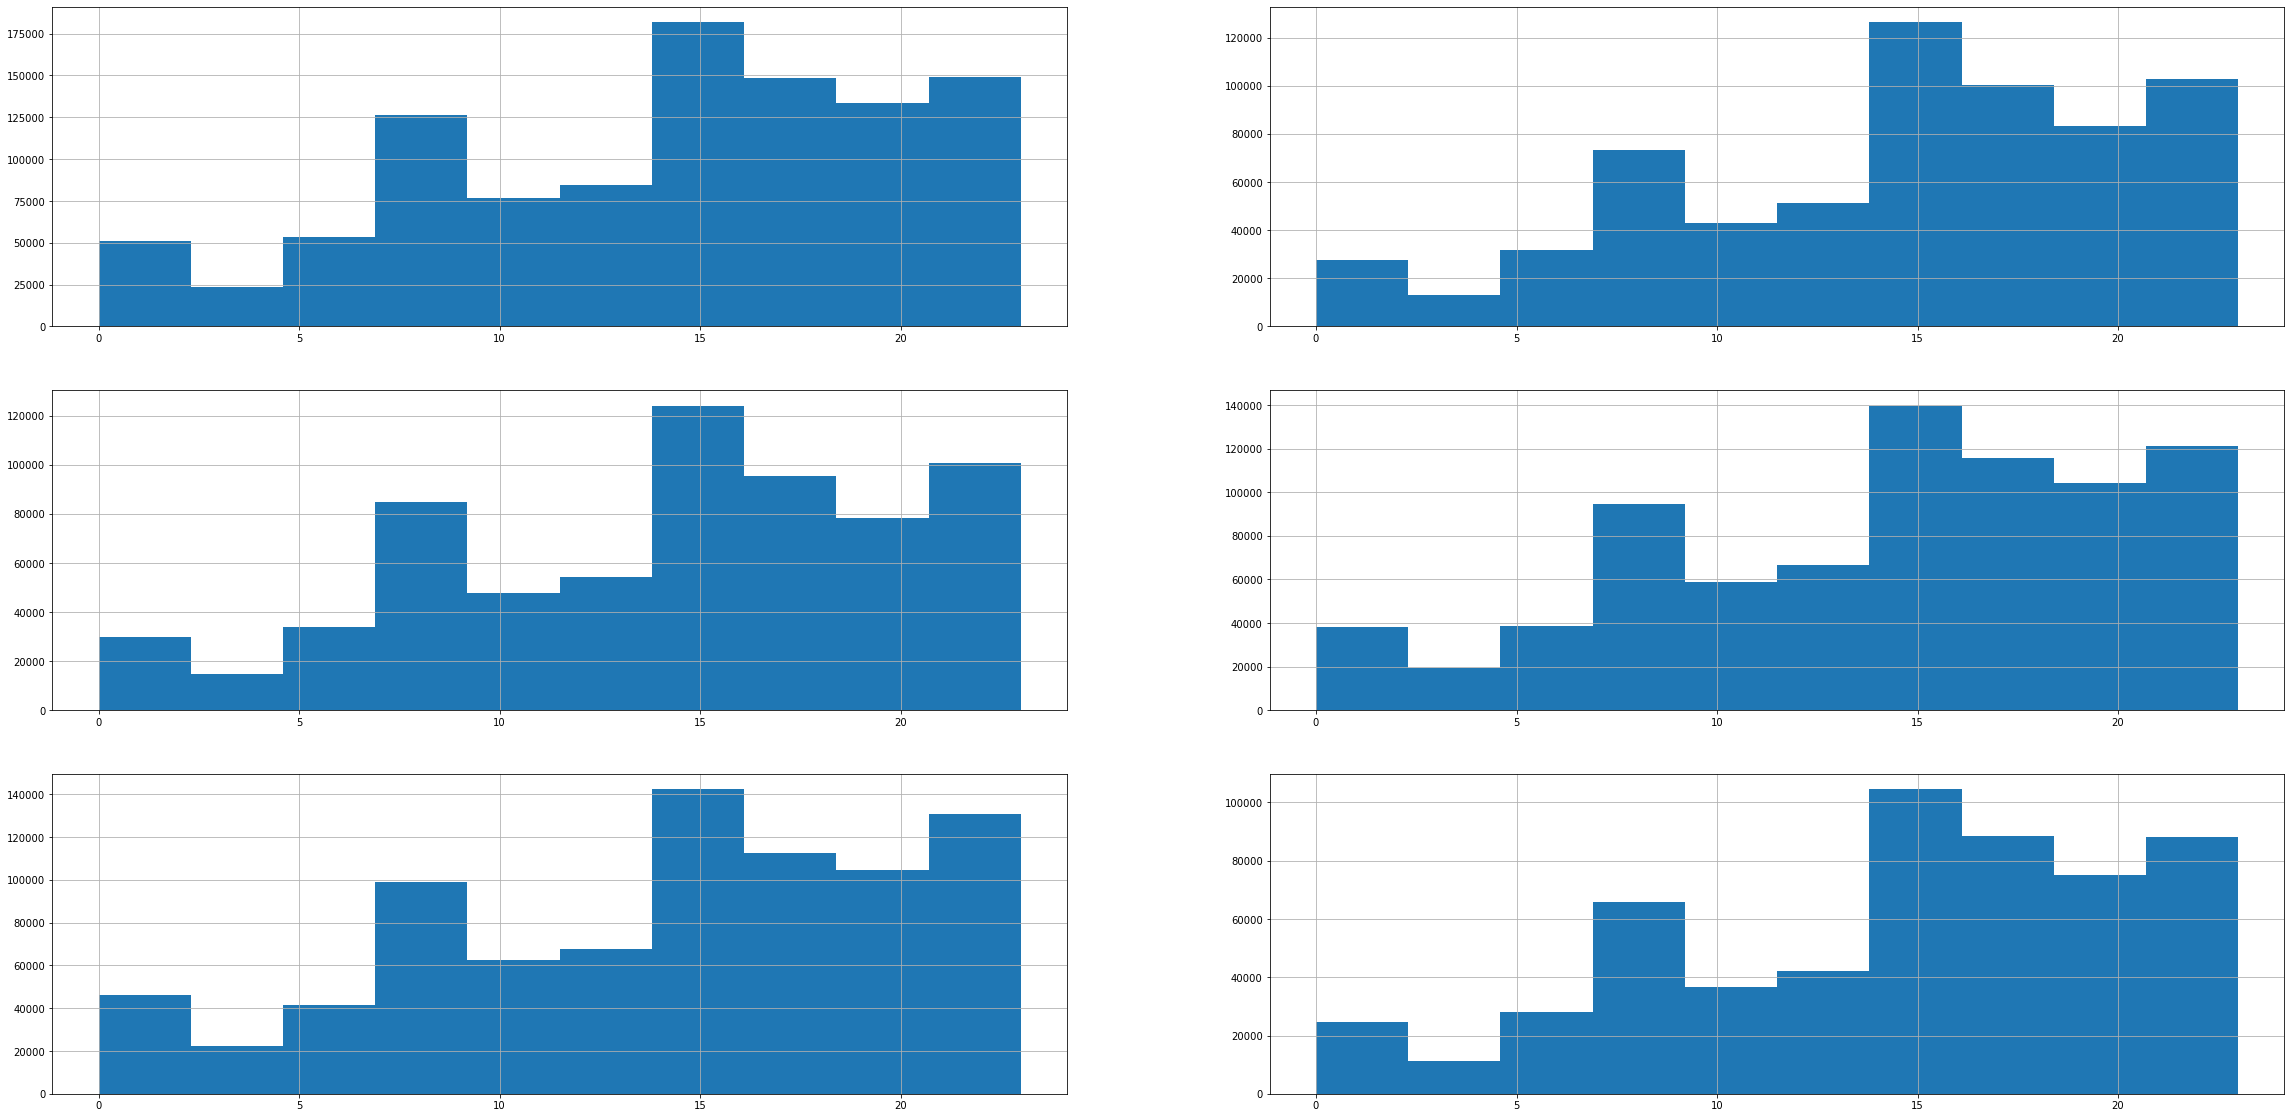

In [45]:
plt.figure(figsize=(40,20))

for index, month in enumerate(df['month'].unique()):
    plt.subplot(3,2,index+1)
    df[df['month']==month]['hour'].hist()

## 4. Analysing Monthly rides

### Q1 Analysis of which month has max rides

#### A. display head

In [46]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


#### B. Group hour by each month

In [47]:
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

#### C. Display iplot Bar Chart X = name of month and Y = number of rides

In [52]:
trace1 = go.Bar(
    x = df.groupby('month')['hour'].count().index,
    y = df.groupby('month')['hour'].count(),
    name = 'Priority'
)

In [71]:
iplot([trace1])

### Q2. Analysis of Journey of Each Day

Text(0.5, 1.0, 'Journeys by month day')

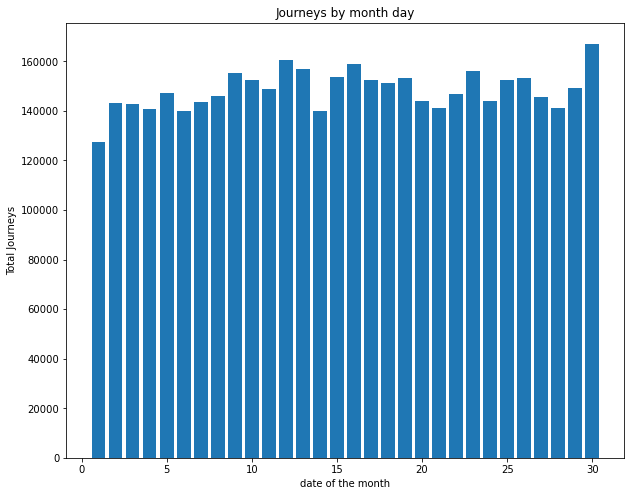

In [68]:
plt.figure(figsize=(10,8))
plt.hist(df['day'], bins=30, rwidth=0.8, range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by month day')

## 5. Analysing Demon of Ubers

### Q1. Analysis of Total rides month wise

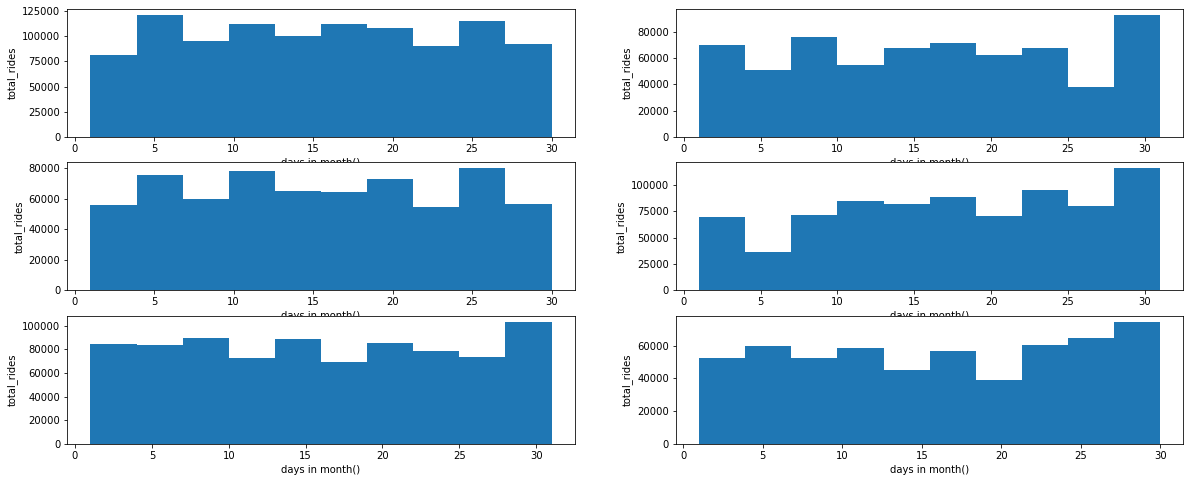

In [74]:
plt.figure(figsize=(20,8))

for index,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,index)
    df_out=df[df['month'] == month]
    plt.hist(df_out['day'])
    plt.xlabel('days in month()'.format(month))
    plt.ylabel('total_rides')

### Q2. Analysing Rush in hour

Text(0.5, 1.0, 'hours of day vs latitude of passenger')

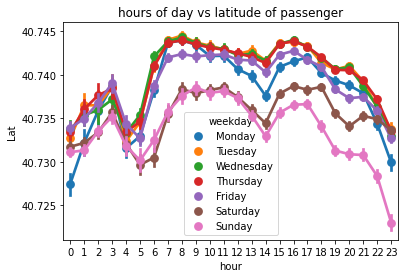

In [78]:
ax = sns.pointplot(x='hour', y='Lat', data=df, hue='weekday')
ax.set_title('hours of day vs latitude of passenger')